I want to take a random image and generate a shattered'esque image from it. I was reading about a cool way to generate random polygons and wanted to give it a go. I'll be dividing a given image into grids and forming a random polygon within each subgrid.

In [498]:
#Import Dependencies
import matplotlib.image as img 
import matplotlib.pyplot as plt 
import matplotlib.patches as pch 
import numpy as np
from PIL import Image, ImageDraw
import imageio
import math
import random
from scipy import misc
import itertools


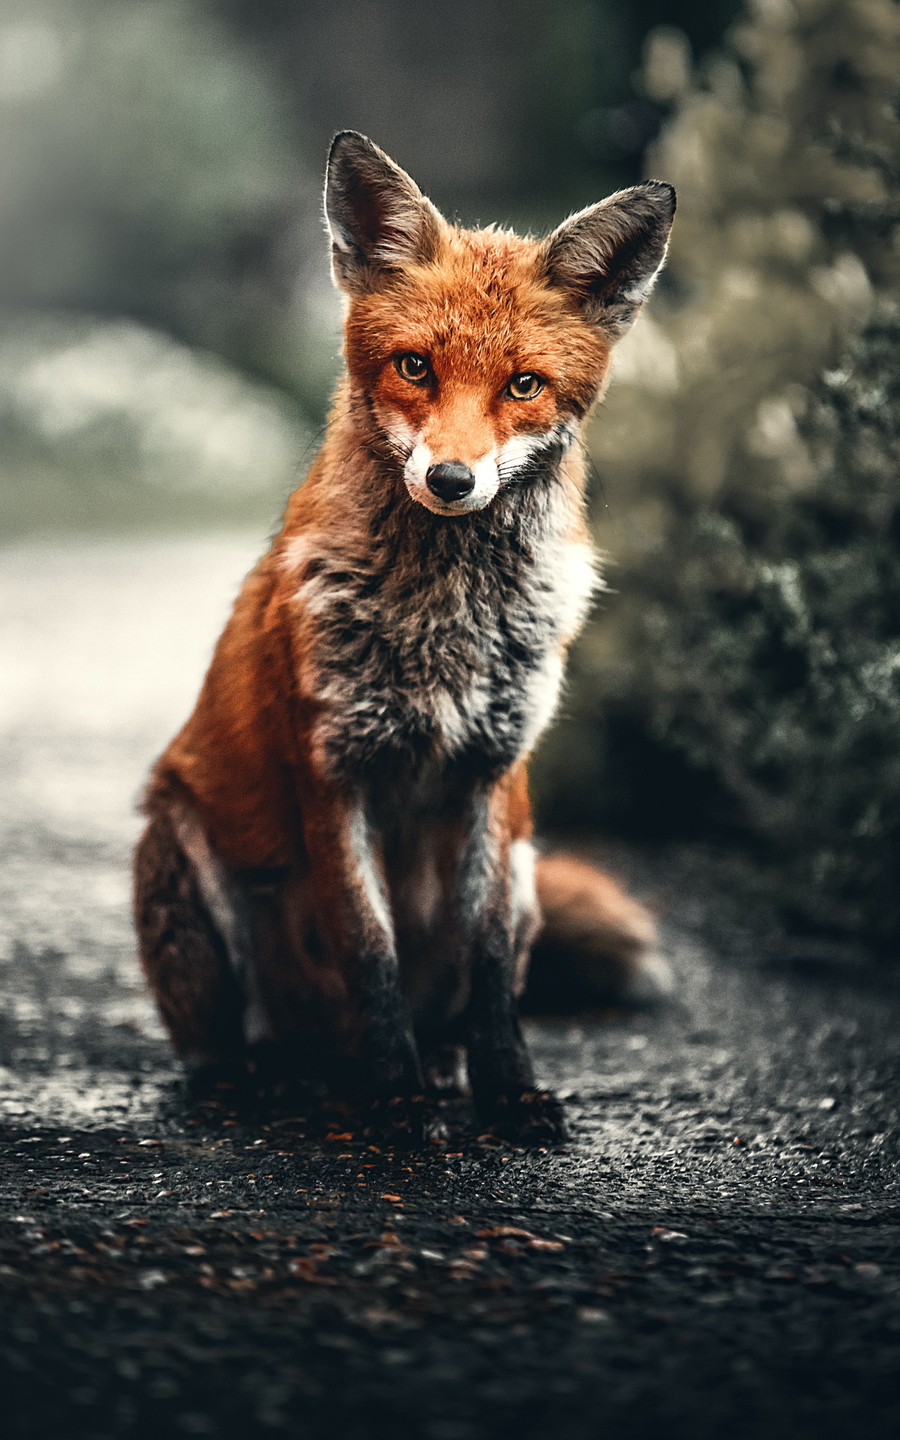

In [499]:
#Set Path To Your Image
path = r"C:\Users\APOORV\Downloads\alexander-andrews-mEdKuPYJe1I-unsplash.jpg"
face = misc.face()
face = imageio.imread(path)
#generate an array
img = Image.fromarray(face)
width  = img.size[0]
height = img.size[1]
img = Image.fromarray(face)
width  = img.size[0]
height = img.size[1]

aspect = width / float(height)

ideal_width = 100*9
ideal_height = 160*9

ideal_aspect = ideal_width / float(ideal_height)

if aspect > ideal_aspect:
    # Then crop the left and right edges:
    new_width = int(ideal_aspect * height)
    offset = (width - new_width) / 2
    resize = (offset, 0, width - offset, height)
else:
    # ... crop the top and bottom:
    new_height = int(width / ideal_aspect)
    offset = (height - new_height) / 2
    resize = (0, offset, width, height - offset)
img = img.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
img

Now, let's define the number of subgrids we want

In [500]:
 def clip(x, min, max) :
     if( min > max ) :  return x    
     elif( x < min ) :  return min
     elif( x > max ) :  return max
     else :             return x

In [503]:
img.size

(900, 1440)

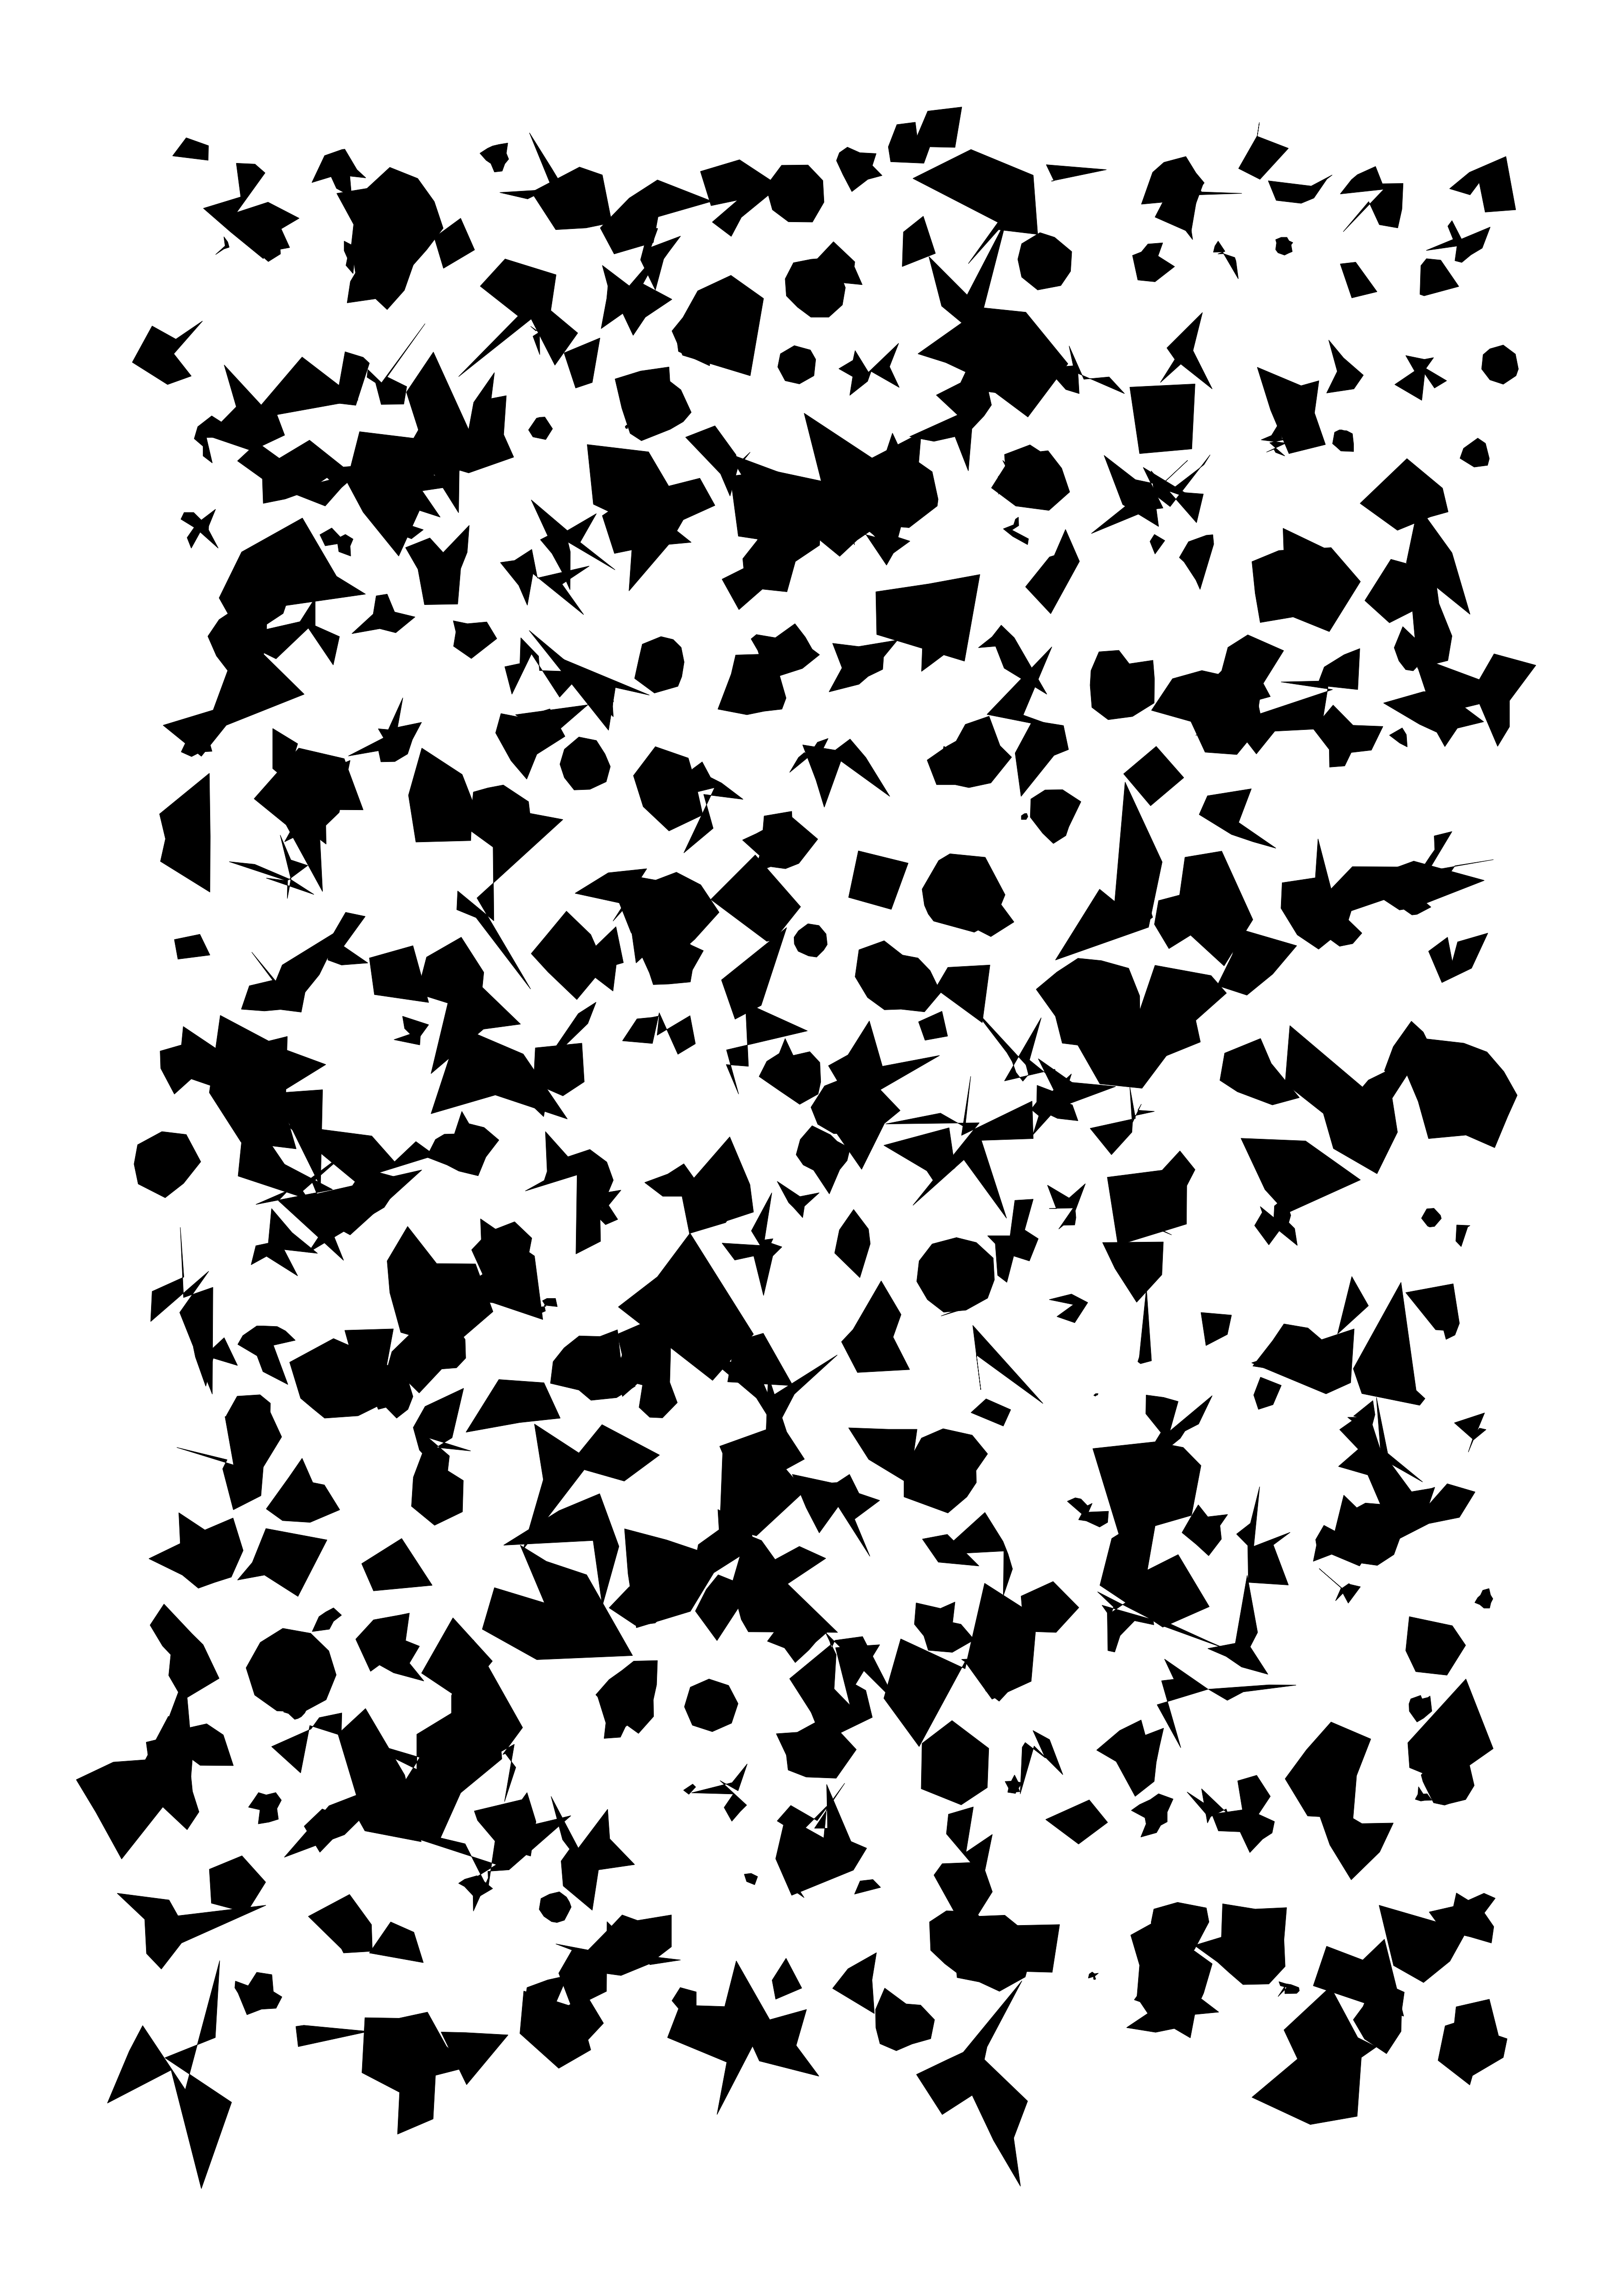

In [501]:
xdiv, ydiv = [20, 20]

grid_points_x = np.arange(0, width-1, int(width/xdiv))
grid_points_y = np.arange(0, height-1, int(height/ydiv))
pts = itertools.product(grid_points_x, grid_points_y)
DPI = fig.get_dpi()
plt.rcParams["figure.figsize"] = [width/float(DPI),height/float(DPI)]


fig, ax = plt.subplots() 
im = Image.new('RGB', img.size, 'white')
imPxAccess = im.load()
s = []
draw = PIL.ImageDraw.Draw(im)
for p in range(len(grid_points_x)-1):
    for j in range(len(grid_points_y)-1):
        ctrX = grid_points_x[p]/2 + grid_points_x[p+1]/2 + random.randrange(-int(width/(2*xdiv)), int(width/(2*xdiv)) )
        ctrY = grid_points_y[j]/2 + grid_points_y[j+1]/2 + random.randrange(-int(height/(2*ydiv)), int(height/(2*ydiv)) )
        aveRadius = min(ctrX - grid_points_x[p], ctrY - grid_points_y[j],
                        ctrX - grid_points_x[p+1], ctrY - grid_points_y[j+1])
        aveRadius/=2
        numVerts = random.randint(4, 12)
        irregularity = random.random() * 2*math.pi / numVerts
        spikeyness = random.random() *aveRadius
        # generate n angle steps
        angleSteps = []
        lower = (2*math.pi / numVerts) - irregularity
        upper = (2*math.pi / numVerts) + irregularity
        sum = 0
        for i in range(numVerts) :
            tmp = random.uniform(lower, upper)
            angleSteps.append( tmp )
            sum = sum + tmp

        # normalize the steps so that point 0 and point n+1 are the same
        k = sum / (2*math.pi)
        for i in range(numVerts) :
            angleSteps[i] = angleSteps[i] / k

        # now generate the points
        points = []
        angle = random.uniform(0, 2*math.pi)
        for i in range(numVerts) :
            r_i = clip( random.gauss(aveRadius, spikeyness), 0, aveRadius )            
            x = ctrX + r_i*math.cos(angle)
            y = ctrY + r_i*math.sin(angle)
            points.append( (int(x),int(y)) )

            angle = angle + angleSteps[i]

        points.append(points[0])
        s.append(points)
        xs, ys = zip(*points) #create lists of x and y values
        plt.fill(xs,ys, color = 'black') 

plt.axis('off')
plt.savefig ( "polys.jpg", quality = 100 )


        



In [502]:
polyfig = misc.face()
polyfig = imageio.imread('polys.jpg')
np.shape(polyfig)

(6623, 4525, 3)

In [497]:
check = polyfig
rad = np.asarray(img)

for i in range(height):
    for j in range(width):
        if(np.array_equal(check[i, j],[0, 0, 0])):
            check[i, j] = rad[i, j]
fin = Image.fromarray(check, 'RGB')

IndexError: index 1777 is out of bounds for axis 1 with size 900

In [ ]:
fin


In [ ]:
fin.save('shattered.jpg', quality = 100)